## Object Detection using Darknet - an opensource neural network framework which gives highly accurate results for real time object detection

### Importing necessary libraries

In [1]:
from darknet import Darknet
from utils import *
import cv2
import matplotlib.pyplot as plt

### Reading the model weights and configurations of the predefine YOLO object detection architecture

In [2]:
cfg='yolov3.cfg'
weights='yolov3.weights'
coco_names='coco.names'

### Initialising the model weights and configurations to our object detection architechture

In [3]:
model=Darknet(cfg)
model.load_weights(weights)

In [4]:
names=load_class_names(coco_names)

### Running the model on a test image 



It took 1.515 seconds to detect the objects in the image.

Number of Objects Detected: 3 



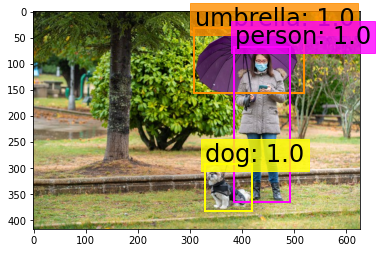

In [5]:
nms_thres=0.6 #if less then eliminated
iou=0.4 #if more then eliminated



img=cv2.imread('woman-dog-park.jpg')
               
color=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
               
image=cv2.resize(img, (model.width, model.height))

detect=detect_objects(model, image, iou, nms_thres)
              
#print(detect)

plot_boxes(color, detect, names, plot_labels=True)

#plt.rcParams['figure.figsize']=[36.0,20.0] #image in magnified view or 

### Defining a function which captures frames from the video taken by web-camera, the frames will be used as images on which our model will be able to detected objects

In [6]:
cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()
    width, height = img.shape[1], img.shape[0]
   
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(original_image, (model.width, model.height))
   
    iou_thresh = 0.4 #if less then eliminated
    nms_thresh = 0.6 #if more then eliminated
   
    boxes = detect_objects(model, resized_image, iou_thresh, nms_thresh)
   
    for i in range(len(boxes)):
       
        box = boxes[i]
       
        x1 = int(np.around((box[0] - box[2]/2.0) * width))
        y1 = int(np.around((box[1] - box[3]/2.0) * height))
        x2 = int(np.around((box[0] + box[2]/2.0) * width))
        y2 = int(np.around((box[1] + box[3]/2.0) * height))
       
        img = cv2.rectangle(img, (x1, y1), (x1+x2, y1+y2), (255, 0, 5), 2)
        cls_name = f'{names[box[6]]} : {round(float(box[5]), 2) * 100}%'
        img = cv2.putText(img, cls_name, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        print(cls_name)
   
    cv2.imshow('frame', img)
   
    key = cv2.waitKey(1)
    if key == 27:
        cap.release()
        cv2.destroyAllWindows()
        break



It took 1.325 seconds to detect the objects in the image.

Number of Objects Detected: 0 



It took 1.247 seconds to detect the objects in the image.

Number of Objects Detected: 1 

person : 100.0%


It took 1.830 seconds to detect the objects in the image.

Number of Objects Detected: 1 

person : 100.0%


It took 1.325 seconds to detect the objects in the image.

Number of Objects Detected: 1 

person : 100.0%


It took 1.259 seconds to detect the objects in the image.

Number of Objects Detected: 1 

person : 100.0%


It took 1.250 seconds to detect the objects in the image.

Number of Objects Detected: 2 

person : 100.0%
cat : 80.0%


It took 1.225 seconds to detect the objects in the image.

Number of Objects Detected: 1 

person : 100.0%


It took 1.239 seconds to detect the objects in the image.

Number of Objects Detected: 2 

person : 100.0%
person : 100.0%


It took 1.236 seconds to detect the objects in the image.

Number of Objects Detected: 2 

person : 100.0%
person 